In [162]:
# импортируем необходимые библиотеки для анализа данных и построении графиков
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# это уберёт предупреждения, которые могут выкидывать некоторые методы
import warnings
warnings.filterwarnings("ignore")

# зададим параметры для будущих графиков
sns.set(rc={'figure.figsize':(14,8)}, style="whitegrid", font='sans-serif')

### В интернет магазине повысили порог бесплатной доставки с 1500 рублей до 3000 рублей, для следующих вариантов доставки: стандартная курьерская доставка и доставки с самовывозом с 02.11.2022 г. для ускоренной доставки цена не изменилась, осталась бесплатной для любой суммы заказа. Необходимо проанализировать как повышение порога бесплатной доставки повлияют на основные метрики, сделать выводы.

In [2]:
data_project = pd.read_excel('C:/Users/MAGICAL/Desktop/Python/df/Delivery_data.xlsx')

In [3]:
data_project.head()

,Наименование способа доставки,Номер заказа,Дата создания заказа,Условия,Продажи руб,ASP,UPT
0,Курьер: стандартная доставка,10451067,2022-10-01,old,3198,1599.000000,2
1,Курьер: стандартная доставка,10451095,2022-10-01,old,2437,812.333333,3
2,Курьер: стандартная доставка,10451097,2022-10-01,old,3198,1599.000000,2
3,Курьер: стандартная доставка,10451115,2022-10-01,old,3172,1057.333333,3
4,Курьер: стандартная доставка,10451145,2022-10-01,old,998,499.000000,2


In [4]:
# размерность данных
data_project.shape

(27069, 7)

In [5]:
# типы данных
data_project.dtypes

Наименование способа доставки            object
Номер заказа                              int64
Дата создания заказа             datetime64[ns]
Условия                                  object
Продажи руб                               int64
ASP                                     float64
UPT                                       int64
dtype: object

In [6]:
# проверка на наличие пропущенных значений в данных
data_project.isna().sum()

Наименование способа доставки    0
Номер заказа                     0
Дата создания заказа             0
Условия                          0
Продажи руб                      0
ASP                              0
UPT                              0
dtype: int64

In [7]:
# для удобства анализа переименуем колонки в данных
data_delivery = data_project.rename(columns={'Наименование способа доставки' : 'name_delivery',
                                             'Номер заказа' : 'num_order',
                                             'Дата создания заказа' : 'date_create_order',
                                             'Условия' : 'conditions',
                                             'Продажи руб' : 'sales_rub'})

In [8]:
data_delivery.head()

,name_delivery,num_order,date_create_order,conditions,sales_rub,ASP,UPT
0,Курьер: стандартная доставка,10451067,2022-10-01,old,3198,1599.000000,2
1,Курьер: стандартная доставка,10451095,2022-10-01,old,2437,812.333333,3
2,Курьер: стандартная доставка,10451097,2022-10-01,old,3198,1599.000000,2
3,Курьер: стандартная доставка,10451115,2022-10-01,old,3172,1057.333333,3
4,Курьер: стандартная доставка,10451145,2022-10-01,old,998,499.000000,2


### Отсортируем данные на 2 периода:
1. до повышения порога бесплатной доставки, **31 день**
2. после повышения порога бесплатной доставки, **26 дней**

In [9]:
# данные до повышения и их продолжительность
data_delivery_old = data_delivery.query("date_create_order < '2022-11-02'")
data_delivery_old['date_create_order'].max() - data_delivery_old['date_create_order'].min()

Timedelta('31 days 00:00:00')

In [10]:
# данные после повышения и их продолжительность
data_delivery_new = data_delivery.query("date_create_order >= '2022-11-02'")
data_delivery_new['date_create_order'].max() - data_delivery_new['date_create_order'].min()

Timedelta('26 days 00:00:00')

In [11]:
# посмотрим на количество уникальных заказов до повышения, в разбивке по способу доставки
uniq_orders_old = data_delivery_old.groupby('name_delivery', as_index=False)['num_order'].nunique().sort_values('num_order', ascending=False)
uniq_orders_old

,name_delivery,num_order
3,Самовывоз из пункта выдачи,3001
4,Самовывоз с примеркой в магазин,2934
1,Курьер: стандартная доставка,1689
5,"Самовывоз, доставка в магазин",822
0,Доставка из магазина в ПВЗ,725
2,Курьер: ускоренная доставка,555
6,самовывоз PickPoint,458


<Axes: title={'center': 'Уникальные заказы до поднятия цен'}, xlabel='name_delivery', ylabel='num_order'>

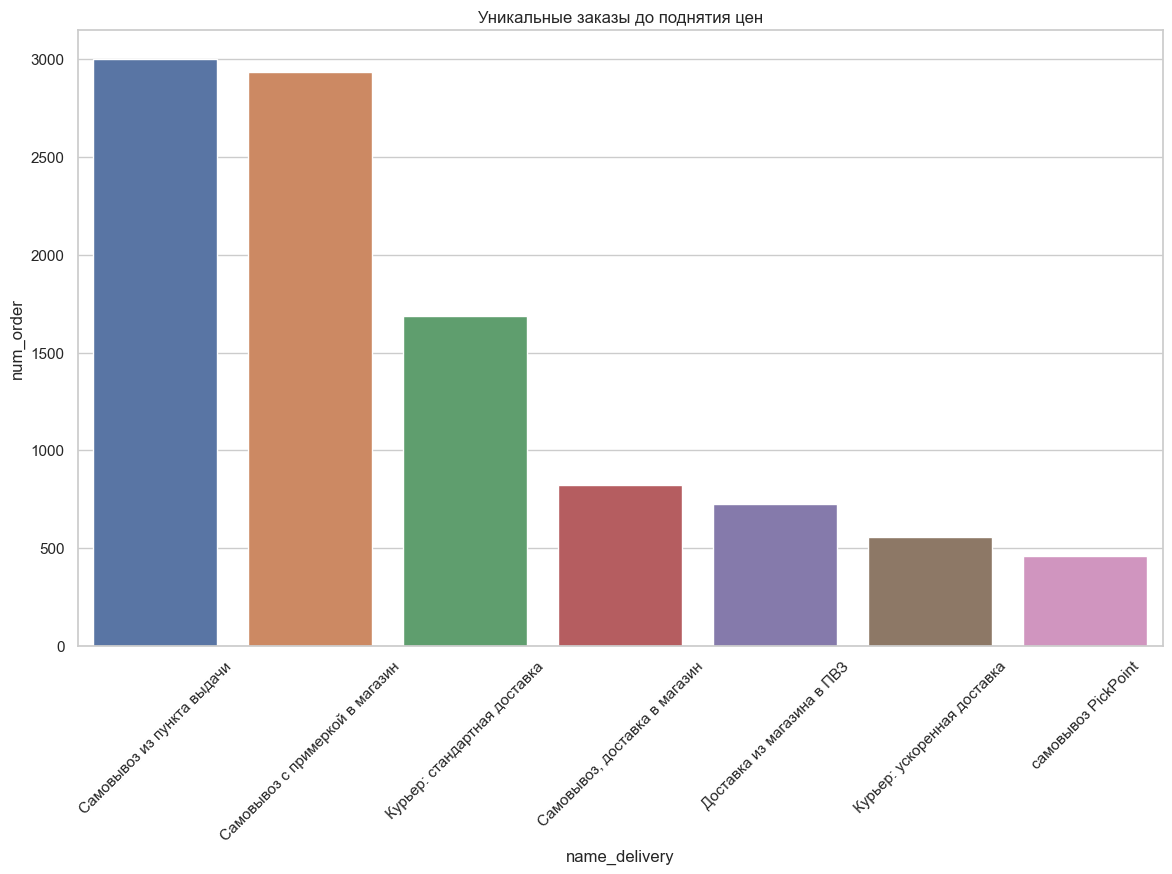

In [13]:
plt.title('Уникальные заказы до поднятия цен')
plt.xticks(rotation=45)
sns.barplot(data=uniq_orders_old, x='name_delivery', y='num_order')

In [14]:
# посмотрим на количество уникальных заказов после повышения, в разбивке по способу доставки
uniq_orders_new = data_delivery_new.groupby('name_delivery', as_index=False)['num_order'].nunique().sort_values('num_order', ascending=False)
uniq_orders_new

,name_delivery,num_order
4,Самовывоз с примеркой в магазин,3238
3,Самовывоз из пункта выдачи,2583
1,Курьер: стандартная доставка,2107
5,"Самовывоз, доставка в магазин",922
2,Курьер: ускоренная доставка,771
0,Доставка из магазина в ПВЗ,660
6,самовывоз PickPoint,280


<Axes: title={'center': 'Уникальные заказы после поднятия цен'}, xlabel='name_delivery', ylabel='num_order'>

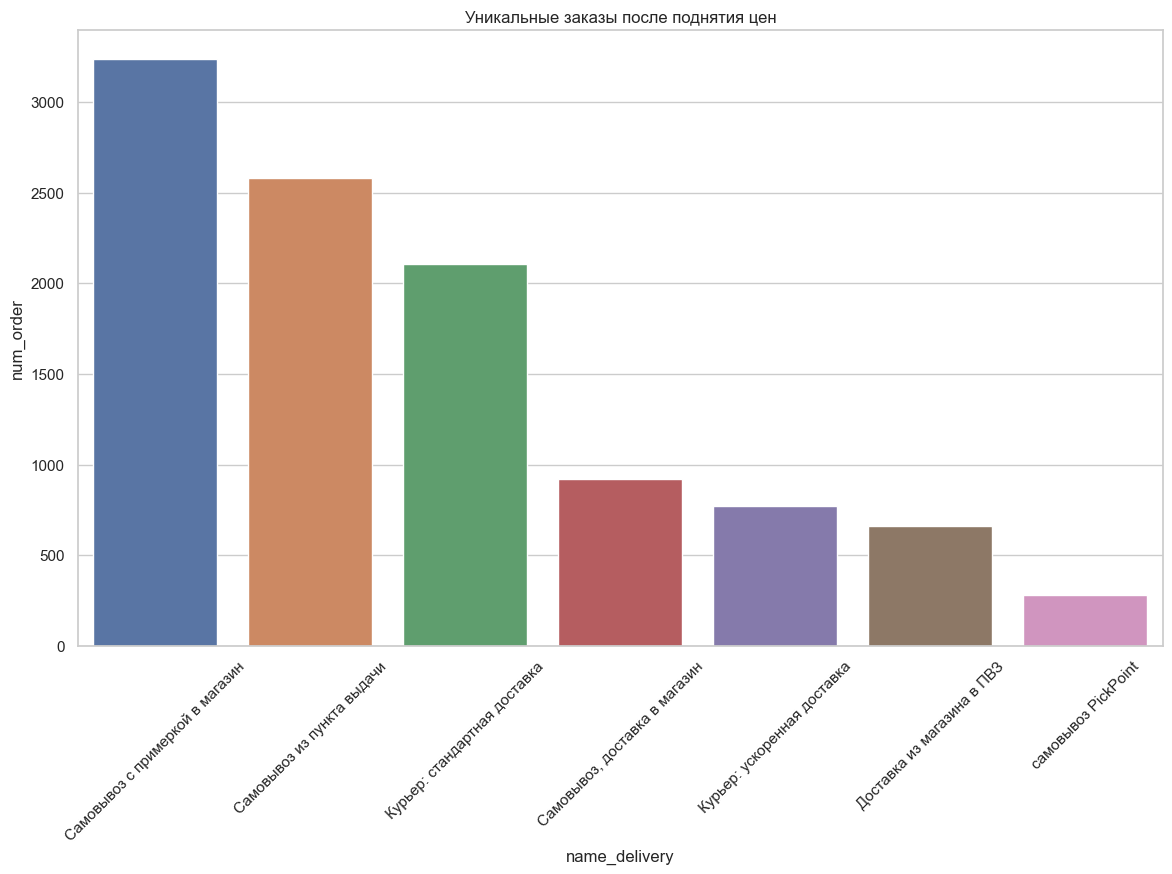

In [15]:
plt.title('Уникальные заказы после поднятия цен')
plt.xticks(rotation=45)
sns.barplot(data=uniq_orders_new, x='name_delivery', y='num_order')

### Для начала сравним средний чек, в разрезе по способу доставки, до поднятия цен и после

In [16]:
def mean_sales_rub(df):
    standart_delivery = df[df.name_delivery == 'Курьер: стандартная доставка']['sales_rub'].mean().round(0)
    pickpoint = df[df.name_delivery == 'самовывоз PickPoint']['sales_rub'].mean().round(0)
    pickup_point = df[df.name_delivery == 'Самовывоз из пункта выдачи']['sales_rub'].mean().round(0)
    pickup_the_store = df[df.name_delivery == 'Самовывоз с примеркой в магазин']['sales_rub'].mean().round(0)
    pickup_delivery = df[df.name_delivery == 'Самовывоз, доставка в магазин']['sales_rub'].mean().round(0)
    pickup_from_magazine = df[df.name_delivery == 'Доставка из магазина в ПВЗ']['sales_rub'].mean().round(0)
    accelerated = df[df.name_delivery == 'Курьер: ускоренная доставка']['sales_rub'].mean().round(0)
    return print(f'средний чек для способа доставки курьер: стандартная доставка составляет {standart_delivery}\n'
                f'средний чек для способа доставки самовывоз PickPoint составляет {pickpoint}\n'
                f'средний чек для способа доставки самовывоз из пункта выдачи {pickup_point}\n'
                f'средний чек для способа доставки cамовывоз с примеркой в магазин {pickup_the_store}\n'
                f'средний чек для способа доставки cамовывоз, доставка в магазин {pickup_delivery}\n'
                f'средний чек для способа доставки доставка из магазина в ПВЗ {pickup_from_magazine}\n'
                f'средний чек для способа ускоренная доставка {accelerated}\n')
    

In [102]:
# средний чек до повышения цен
mean_sales_rub(data_delivery_old)

средний чек для способа доставки курьер: стандартная доставка составляет 3930.0
средний чек для способа доставки самовывоз PickPoint составляет 2799.0
средний чек для способа доставки самовывоз из пункта выдачи 2757.0
средний чек для способа доставки cамовывоз с примеркой в магазин 2183.0
средний чек для способа доставки cамовывоз, доставка в магазин 2498.0
средний чек для способа доставки доставка из магазина в ПВЗ 2766.0
средний чек для способа ускоренная доставка 2853.0



In [17]:
# средний чек после повышения цен
mean_sales_rub(data_delivery_new)

средний чек для способа доставки курьер: стандартная доставка составляет 4004.0
средний чек для способа доставки самовывоз PickPoint составляет 3214.0
средний чек для способа доставки самовывоз из пункта выдачи 3343.0
средний чек для способа доставки cамовывоз с примеркой в магазин 2265.0
средний чек для способа доставки cамовывоз, доставка в магазин 2707.0
средний чек для способа доставки доставка из магазина в ПВЗ 3023.0
средний чек для способа ускоренная доставка 2883.0



### после поднятия цен средний чек в разрезе по способу доставки незначительно повысился, даже с учётом того, что рассматриваемый период после поднятия цен меньше периода до поднятия.

In [18]:
data_delivery_old.head()

,name_delivery,num_order,date_create_order,conditions,sales_rub,ASP,UPT
0,Курьер: стандартная доставка,10451067,2022-10-01,old,3198,1599.000000,2
1,Курьер: стандартная доставка,10451095,2022-10-01,old,2437,812.333333,3
2,Курьер: стандартная доставка,10451097,2022-10-01,old,3198,1599.000000,2
3,Курьер: стандартная доставка,10451115,2022-10-01,old,3172,1057.333333,3
4,Курьер: стандартная доставка,10451145,2022-10-01,old,998,499.000000,2


### Посмотрим поменялось ли среднее количество заказов в чеке и их средняя стоимость, в разрезе по способу доставки до поднятия цен и после, также посмотрим общую выручку, общее количество сделанных заказов.

In [62]:
# до поднятия цен
mean_delivery_old = data_delivery_old.groupby('name_delivery', as_index=False) \
                 .agg({'UPT' : 'mean' , 'ASP' : 'mean', 'sales_rub' : 'sum'}).round(2) \
                 .rename(columns={'UPT' : 'mean_UPT_old', 'ASP' : 'mean_ASP_old', 'sales_rub' : 'all_sales_old'}) \
                 .sort_values('mean_UPT_old', ascending=False)

In [63]:
mean_delivery_old

,name_delivery,mean_UPT_old,mean_ASP_old,all_sales_old
1,Курьер: стандартная доставка,4.17,1100.00,8004407
3,Самовывоз из пункта выдачи,3.08,1143.23,11299595
6,самовывоз PickPoint,2.92,1248.66,1354579
5,"Самовывоз, доставка в магазин",2.33,1278.74,2248101
0,Доставка из магазина в ПВЗ,2.26,1588.62,2179653
2,Курьер: ускоренная доставка,2.24,1564.65,1734485
4,Самовывоз с примеркой в магазин,1.66,1463.16,9123065


In [65]:
# после поднятия цен
mean_delivery_new = data_delivery_new.groupby('name_delivery', as_index=False) \
                 .agg({'UPT' : 'mean' , 'ASP' : 'mean', 'sales_rub' : 'sum'}).round(2) \
                 .rename(columns={'UPT' : 'mean_UPT', 'ASP' : 'mean_ASP', 'sales_rub' : 'all_sales'}) \
                 .sort_values('mean_UPT', ascending=False)

In [61]:
mean_delivery_new

,name_delivery,mean_UPT,mean_ASP,all_sales
1,Курьер: стандартная доставка,4.37,1061.91,10630204
3,Самовывоз из пункта выдачи,3.82,1035.89,11618794
6,самовывоз PickPoint,3.73,1060.26,941810
5,"Самовывоз, доставка в магазин",2.61,1224.02,2855396
0,Доставка из магазина в ПВЗ,2.33,1625.83,2204011
2,Курьер: ускоренная доставка,2.32,1544.19,2479759
4,Самовывоз с примеркой в магазин,1.66,1488.37,11113248


In [92]:
# полная таблица с данными
full_data_delivery = data_delivery_old.groupby('name_delivery', as_index=False) \
                 .agg(all_orders_old = ('num_order', 'count')) \
                 .sort_values('all_orders_old', ascending=False) \
                 .merge(full_mean_delivery, on='name_delivery') \
                 .merge(orders_new, on='name_delivery')

In [89]:
orders_new = data_delivery_new.groupby('name_delivery', as_index=False) \
                 .agg(all_orders_new = ('num_order', 'count')) \
                 .sort_values('all_orders_new', ascending=False)

In [66]:
full_mean_delivery = mean_delivery_old.merge(mean_delivery_new, on='name_delivery')
full_mean_delivery

,name_delivery,mean_UPT_old,mean_ASP_old,all_sales_old,mean_UPT,mean_ASP,all_sales
0,Курьер: стандартная доставка,4.17,1100.00,8004407,4.37,1061.91,10630204
1,Самовывоз из пункта выдачи,3.08,1143.23,11299595,3.82,1035.89,11618794
2,самовывоз PickPoint,2.92,1248.66,1354579,3.73,1060.26,941810
3,"Самовывоз, доставка в магазин",2.33,1278.74,2248101,2.61,1224.02,2855396
4,Доставка из магазина в ПВЗ,2.26,1588.62,2179653,2.33,1625.83,2204011
5,Курьер: ускоренная доставка,2.24,1564.65,1734485,2.32,1544.19,2479759
6,Самовывоз с примеркой в магазин,1.66,1463.16,9123065,1.66,1488.37,11113248


In [99]:
full_data_delivery

,name_delivery,all_orders_old,mean_UPT_old,mean_ASP_old,all_sales_old,mean_UPT,mean_ASP,all_sales,diff_sales,diff_ASP,diff_UPT,all_orders_new
0,Самовывоз с примеркой в магазин,4179,1.66,1463.16,9123065,1.66,1488.37,11113248,1990183,25.21,0.00,4907
1,Самовывоз из пункта выдачи,4098,3.08,1143.23,11299595,3.82,1035.89,11618794,319199,-107.34,0.74,3476
2,Курьер: стандартная доставка,2037,4.17,1100.00,8004407,4.37,1061.91,10630204,2625797,-38.09,0.20,2655
3,"Самовывоз, доставка в магазин",900,2.33,1278.74,2248101,2.61,1224.02,2855396,607295,-54.72,0.28,1055
4,Доставка из магазина в ПВЗ,788,2.26,1588.62,2179653,2.33,1625.83,2204011,24358,37.21,0.07,729
5,Курьер: ускоренная доставка,608,2.24,1564.65,1734485,2.32,1544.19,2479759,745274,-20.46,0.08,860
6,самовывоз PickPoint,484,2.92,1248.66,1354579,3.73,1060.26,941810,-412769,-188.40,0.81,293


In [74]:
# колонка с разницей среднего количества товара в чеке
full_mean_delivery['diff_UPT'] = full_mean_delivery['mean_UPT'] - full_mean_delivery['mean_UPT_old']

In [73]:
# колонка с разницей средней стоимости товара в чеке
full_mean_delivery['diff_ASP'] = full_mean_delivery['mean_ASP'] - full_mean_delivery['mean_ASP_old']

In [72]:
# разница стоимости товара до поднятия цен и после
full_mean_delivery['diff_sales'] = full_mean_delivery['all_sales'] - full_mean_delivery['all_sales_old']

In [71]:
# выручка после поднятия цен, до поднятия цен, разница между ними
data_delivery_new['sales_rub'].sum(), data_delivery_old['sales_rub'].sum(), data_delivery_new['sales_rub'].sum() - data_delivery_old['sales_rub'].sum()

(41843222, 35943885, 5899337)

In [98]:
# количество заказов до поднятия цен и после
full_data_delivery[['name_delivery', 'all_orders_old', 'all_orders_new']]

,name_delivery,all_orders_old,all_orders_new
0,Самовывоз с примеркой в магазин,4179,4907
1,Самовывоз из пункта выдачи,4098,3476
2,Курьер: стандартная доставка,2037,2655
3,"Самовывоз, доставка в магазин",900,1055
4,Доставка из магазина в ПВЗ,788,729
5,Курьер: ускоренная доставка,608,860
6,самовывоз PickPoint,484,293


### Промежуточные выводы: 
Среднее количество товаров в чеке незначительно увеличилось на всех позициях доставок,а в некоторых видах таких как: Самовывоз из пункта выдачи, самовывоз PickPoint среднее количество товаров возрасло на 0.74 и 0.81 соответственно, то есть примерно на 1 товар в чеке стало больше. Учитывая, что в совокупности на каждой позиции доставок увеличилось среднее число товаров в чеке, то средняя стоимость 1 товара в чеке после поднятия цен уменьшилась. Общая выручка в разрезе по способу доставки составляла до повышения цен 35943885 рублей, а после 41843222, прибыль после поднятия цен составила 5899337 рублей. Больше всего выручки принёс способ стандартная доставка, а также самовывоз с примеркой в магазин, меньшую прибыль принёс способ доставка из магазина в ПВЗ, способ самовывоз PickPoint был убыточен по сравнению с периодом до поднятия цен, разница между ними составила 412769 рублей.
Количество заказов также после поднятия цен увеличилось, исключения составляют только позиции доставки: Самовывоз из пункта выдачи, Доставка из магазина в ПВЗ, самовывоз PickPoint. Также нужно учитывать, что за меньший срок почти все рассмотренные метрики после повышения порога на бесплатную доставку возросли.

### Далее посмотрим на количество заказов с бесплатной доставкой, до поднятия порога и после, посчитаем конверсию из платной доставки в бесплатную в теже периоды, подготовим выводы.

In [115]:
# таблица с бесплатной доставкой после поднятия порога, так как ускоренная доставка на любую сумму бесплатна, мы её исключим
free_delivery_new = data_delivery_new.query("name_delivery != 'Курьер: ускоренная доставка' and sales_rub >= 3000")

In [142]:
# таблица с бесплатной доставкой до поднятия, по тем же причинам исключим ускоренную доставку
free_delivery_old = data_delivery_old.query("sales_rub >= 1500 and name_delivery != 'Курьер: ускоренная доставка'")

### Преобразуем наши данные, для подсчёта коэффицента конверсии из платной доставки в бесплатную в разрезе по способу доставки

**1. период после поднятия порога цены на бесплатную доставку**

In [131]:
grouped_delivery_new = free_delivery_new.groupby('name_delivery', as_index=False).agg(uniq_orders = ('num_order', 'nunique'))

In [134]:
grouped_delivery_new['koef_in_free'] = (grouped_delivery_new['uniq_orders'] / data_delivery_new['num_order'].nunique()) * 100

In [146]:
# общий коэффициент конверсии из бесплатной доставки в платную
free_delivery_new['num_order'].nunique() / data_delivery_new['num_order'].nunique() * 100

60.82761180181851

In [155]:
# данные с коэффициентом конверсии в разрезе по способу доставки
grouped_delivery_new = grouped_delivery_new.rename(columns={'uniq_orders' : 'uniq_orders_free_new'})
grouped_delivery_new

,name_delivery,uniq_orders_free_new,koef_in_free
0,Доставка из магазина в ПВЗ,235,4.360735
1,Курьер: стандартная доставка,1381,25.626276
2,Самовывоз из пункта выдачи,1384,25.681945
3,Самовывоз с примеркой в магазин,902,16.737799
4,"Самовывоз, доставка в магазин",287,5.325663
5,самовывоз PickPoint,135,2.505103


**2. период до поднятия порога цены на бесплатную доставку**

In [143]:
grouped_delivery_old = free_delivery_old.groupby('name_delivery', as_index=False).agg(uniq_orders = ('num_order', 'nunique'))

In [144]:
grouped_delivery_old['koef_in_free_old'] = (grouped_delivery_old['uniq_orders'] / data_delivery_old['num_order'].nunique()) * 100

In [148]:
# общий коэффициент конверсии из бесплатной доставки в платную
free_delivery_old['num_order'].nunique() / data_delivery_old['num_order'].nunique() * 100

87.81143574117225

In [153]:
grouped_delivery_old = grouped_delivery_old.rename(columns={'uniq_orders' : 'free_uniq_orders'})

In [159]:
# соединим наши данные для наглядности сравнения
all_free_uniq_orders = grouped_delivery_old.merge(grouped_delivery_new, on = 'name_delivery')

In [160]:
all_free_uniq_orders

,name_delivery,free_uniq_orders,koef_in_free_old,uniq_orders_free_new,koef_in_free
0,Доставка из магазина в ПВЗ,725,12.995160,235,4.360735
1,Курьер: стандартная доставка,1513,27.119555,1381,25.626276
2,Самовывоз из пункта выдачи,2559,45.868435,1384,25.681945
3,Самовывоз с примеркой в магазин,1978,35.454383,902,16.737799
4,"Самовывоз, доставка в магазин",547,9.804624,287,5.325663
5,самовывоз PickPoint,365,6.542391,135,2.505103


### Выводы:
1. установлено, что общая конверсия из платной доставки в платную до периода поднятия порога на бесплатную доставку составляла 87.81%, а в периоде после 60.83%, что значительно меньше.
2. также коэффициенты конверсии в разрезе по способу доставки в период до поднятия порога по всем пунктам выше чем в период после.
3. количество уникальных заказов с бесплатной доставкой также значительно больше в период до поднятия порога на доставку.
4. учитывая ранее сделанные выводы можно предположить, что в целом покупатели стали чаще покупать больше товаров в магазине, на большую сумму, но чаще общий заказ составляет менее 3000 рублей, выше которого идёт бесплатная доставка, т.е. продолжили пользоваться интернет магазином, даже чаще, но с использованием платной доставки.
5. также на основании данных не совсем корректно стоит делать общий выводы, так как количество, стимость, проводимые акции в интрнет магазине зависят от сезонности, праздников, в связи с чем, имея больше данных, можно сделать более правильные и глубокие выводы, для оценки периода и влияние на метрик поднятие порога цены на бесплатную доставку.